# 03_Poincare_Map_Parameter_tuning.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/cchu/Desktop/phd_work/hyperChromatin/src/PoincareMaps')

import os
workdir = '../results/03'
os.makedirs(workdir, exist_ok=True)


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from refs import celltype_colors
import matplotlib.pyplot as plt
from IPython.display import Image

from main import *
from poincare_maps import *

In [3]:
rna_pca_name = '../results/02/rna_pca.celltype_label'
rna_simba_name = '../results/02/rna_simba.celltype_label'
atac_pca_name = '../results/02/atac_pca.celltype_label'
atac_simba_name = '../results/02/atac_simba.celltype_label'
simba_multi_name = '../results/02/simba_multi.celltype_label'

In [4]:
CG_features, CG_labels = prepare_data(rna_pca_name, 
                                with_labels=True, 
                                normalize=True, 
                                n_pca=0)

Default batchsize is 512. Shorten it to 32?

In [10]:
CG_poincare_coord, _ = compute_poincare_maps(CG_features, CG_labels,
                        f"{workdir}/rna_pca.celltype_label.poincare_coord",
                        mode='features', k_neighbours=15, 
                        distlocal='minkowski', sigma=1.0, gamma=2.0,
                        color_dict=celltype_colors, epochs=100,
                        batchsize=32, lr=0.1, earlystop=0.0001, cuda=0)

Computing laplacian...
Laplacian computed in 2.83 sec
Computing RFA...
RFA computed in 4.93 sec
Starting training...


loss: 0.50008: 100%|██████████████████████████| 100/100 [10:05<00:00,  6.05s/it]


PM computed in 605.20 sec
loss = 5.001e-01
time = 10.090 min


In [6]:
rna_model = PoincareMaps(CG_poincare_coord)
rna_model.plot('ori', labels=CG_labels, file_name=f'{workdir}/rna_pca.celltype_label.poincare_coord_b32', 
           title_name='Poincaré map',
           coldict=celltype_colors, 
           labels_order=None, 
           zoom=4, bbox=(1.1, 0.8), leg=False, ft='png')

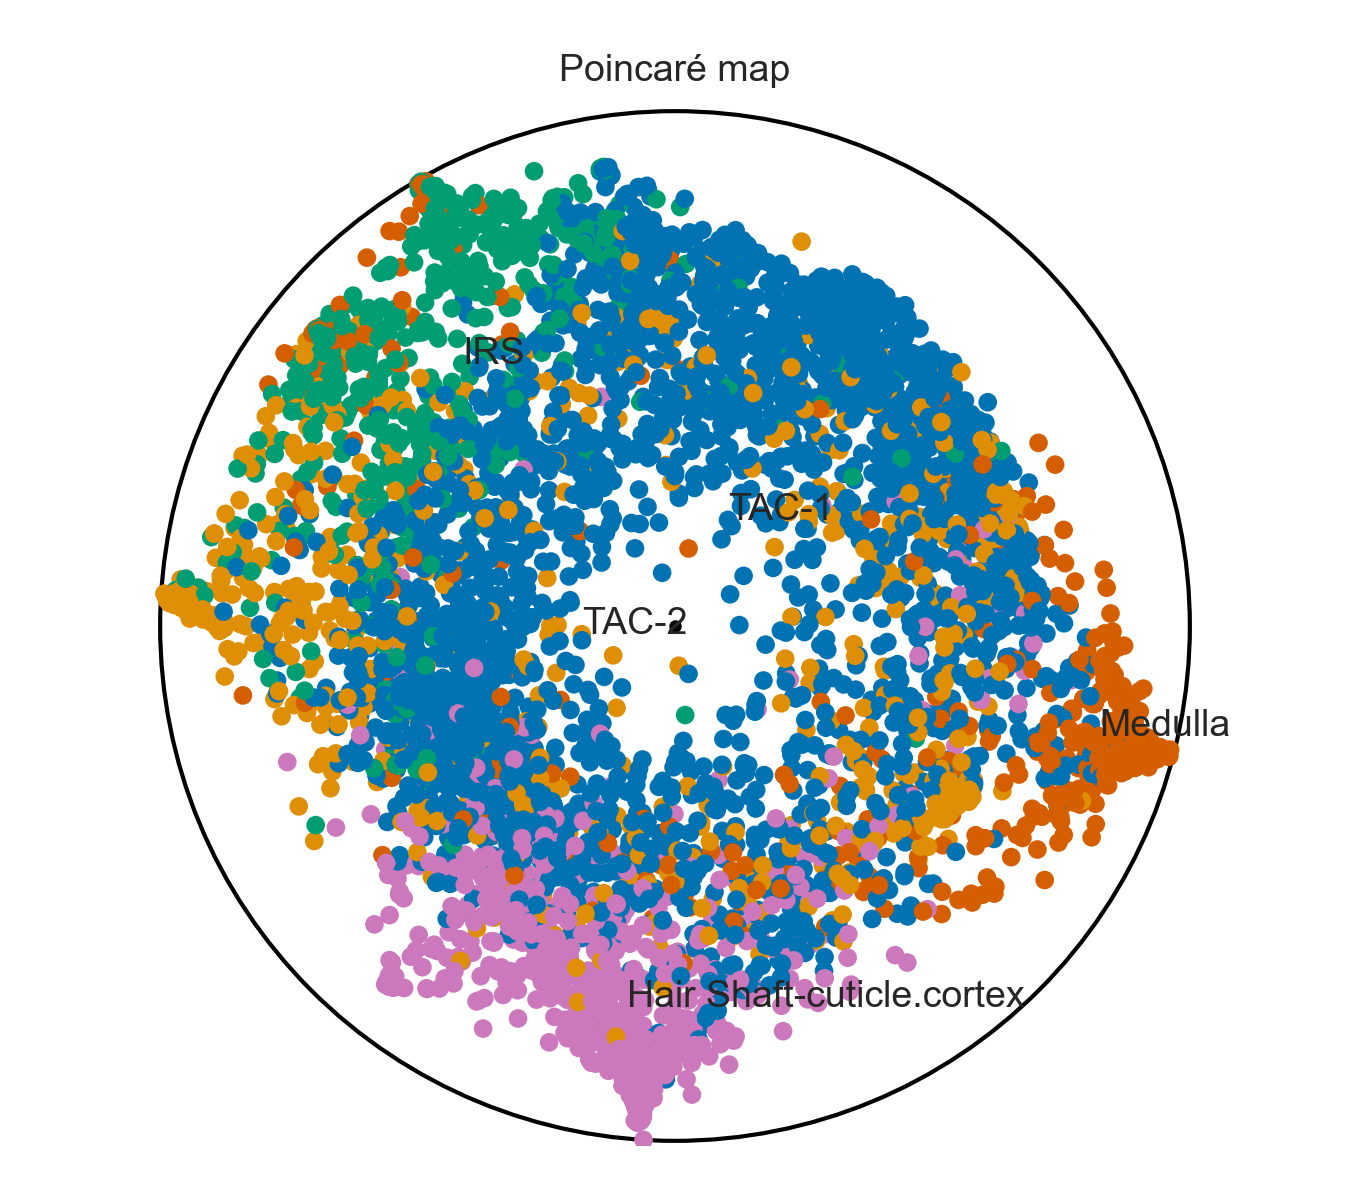

In [7]:
fig = Image(filename=f'{workdir}/rna_pca.celltype_label.poincare_coord_b32.png')
fig